# Import modules

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import math

# Open dataset

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Info per atributte

In [4]:
#We can observe the attributes with missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Name attributes

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Type

## plot type

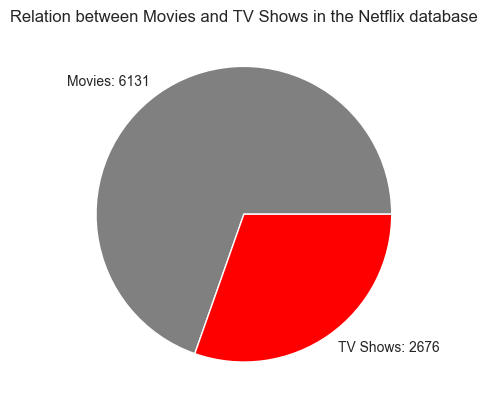

In [6]:
type_ = df['type'].value_counts()
plt.pie(type_,
        labels = ['Movies: ' + str(type_[0]),
                  'TV Shows: ' + str(type_[1])],
        colors = ['gray', 'red'])
plt.title('Relation between Movies and TV Shows in the Netflix database')
plt.show()

## type distribution per country

In [7]:
#Ad we can see, the item 7 as several countries associated, in following cells we gonna unpack them
df[['type','country']].head(10)

,type,country
0,Movie,United States
1,TV Show,South Africa
2,TV Show,NaN
3,TV Show,NaN
4,TV Show,India
5,TV Show,NaN
6,Movie,NaN
7,Movie,"United States, Ghana, Burkina Faso, United Kin..."
8,TV Show,United Kingdom
9,Movie,United States


In [8]:
# Clean data i.e. remove white spaces and make lowercases
df['country'] = df['country'].str.lower()
df['country'] = df['country'].replace(' ', '', regex=True)
types, countries = [], []
for i in range(len(df['country'])):
    # if not str i.e. nan
    if not isinstance(df['country'][i], str):
        #print(0)
        pass
    else:
        #unpack the movies/series with several countries
        if ',' in df['country'][i]:
            l = len(df['country'][i].split(','))
            types.extend([df['type'][i]]*l)
            countries.extend(df['country'][i].split(','))
        else:
            types.append(df['type'][i])
            countries.append(df['country'][i])

In [9]:
#attribute unpacked
df_types_countries = pd.DataFrame({'type' : types, 'country' : countries})
df_types_countries.head()

,type,country
0,Movie,unitedstates
1,TV Show,southafrica
2,TV Show,india
3,Movie,unitedstates
4,Movie,ghana


In [10]:
# Filter the data to specific countries and group it by the type of content
interest_countries = ['unitedstates', 'india', 'unitedkingdom', 'canada', 'france', 'japan', 'spain', 'mexico']
df_types_countries_filtered = df_types_countries.query(("country in @interest_countries"))
df_grouped_type = df_types_countries_filtered.groupby(['country', 'type']).size().reset_index(name='count')
df_grouped_type.head(6)

,country,type,count
0,canada,Movie,319
1,canada,TV Show,126
2,france,Movie,303
3,france,TV Show,90
4,india,Movie,962
5,india,TV Show,84


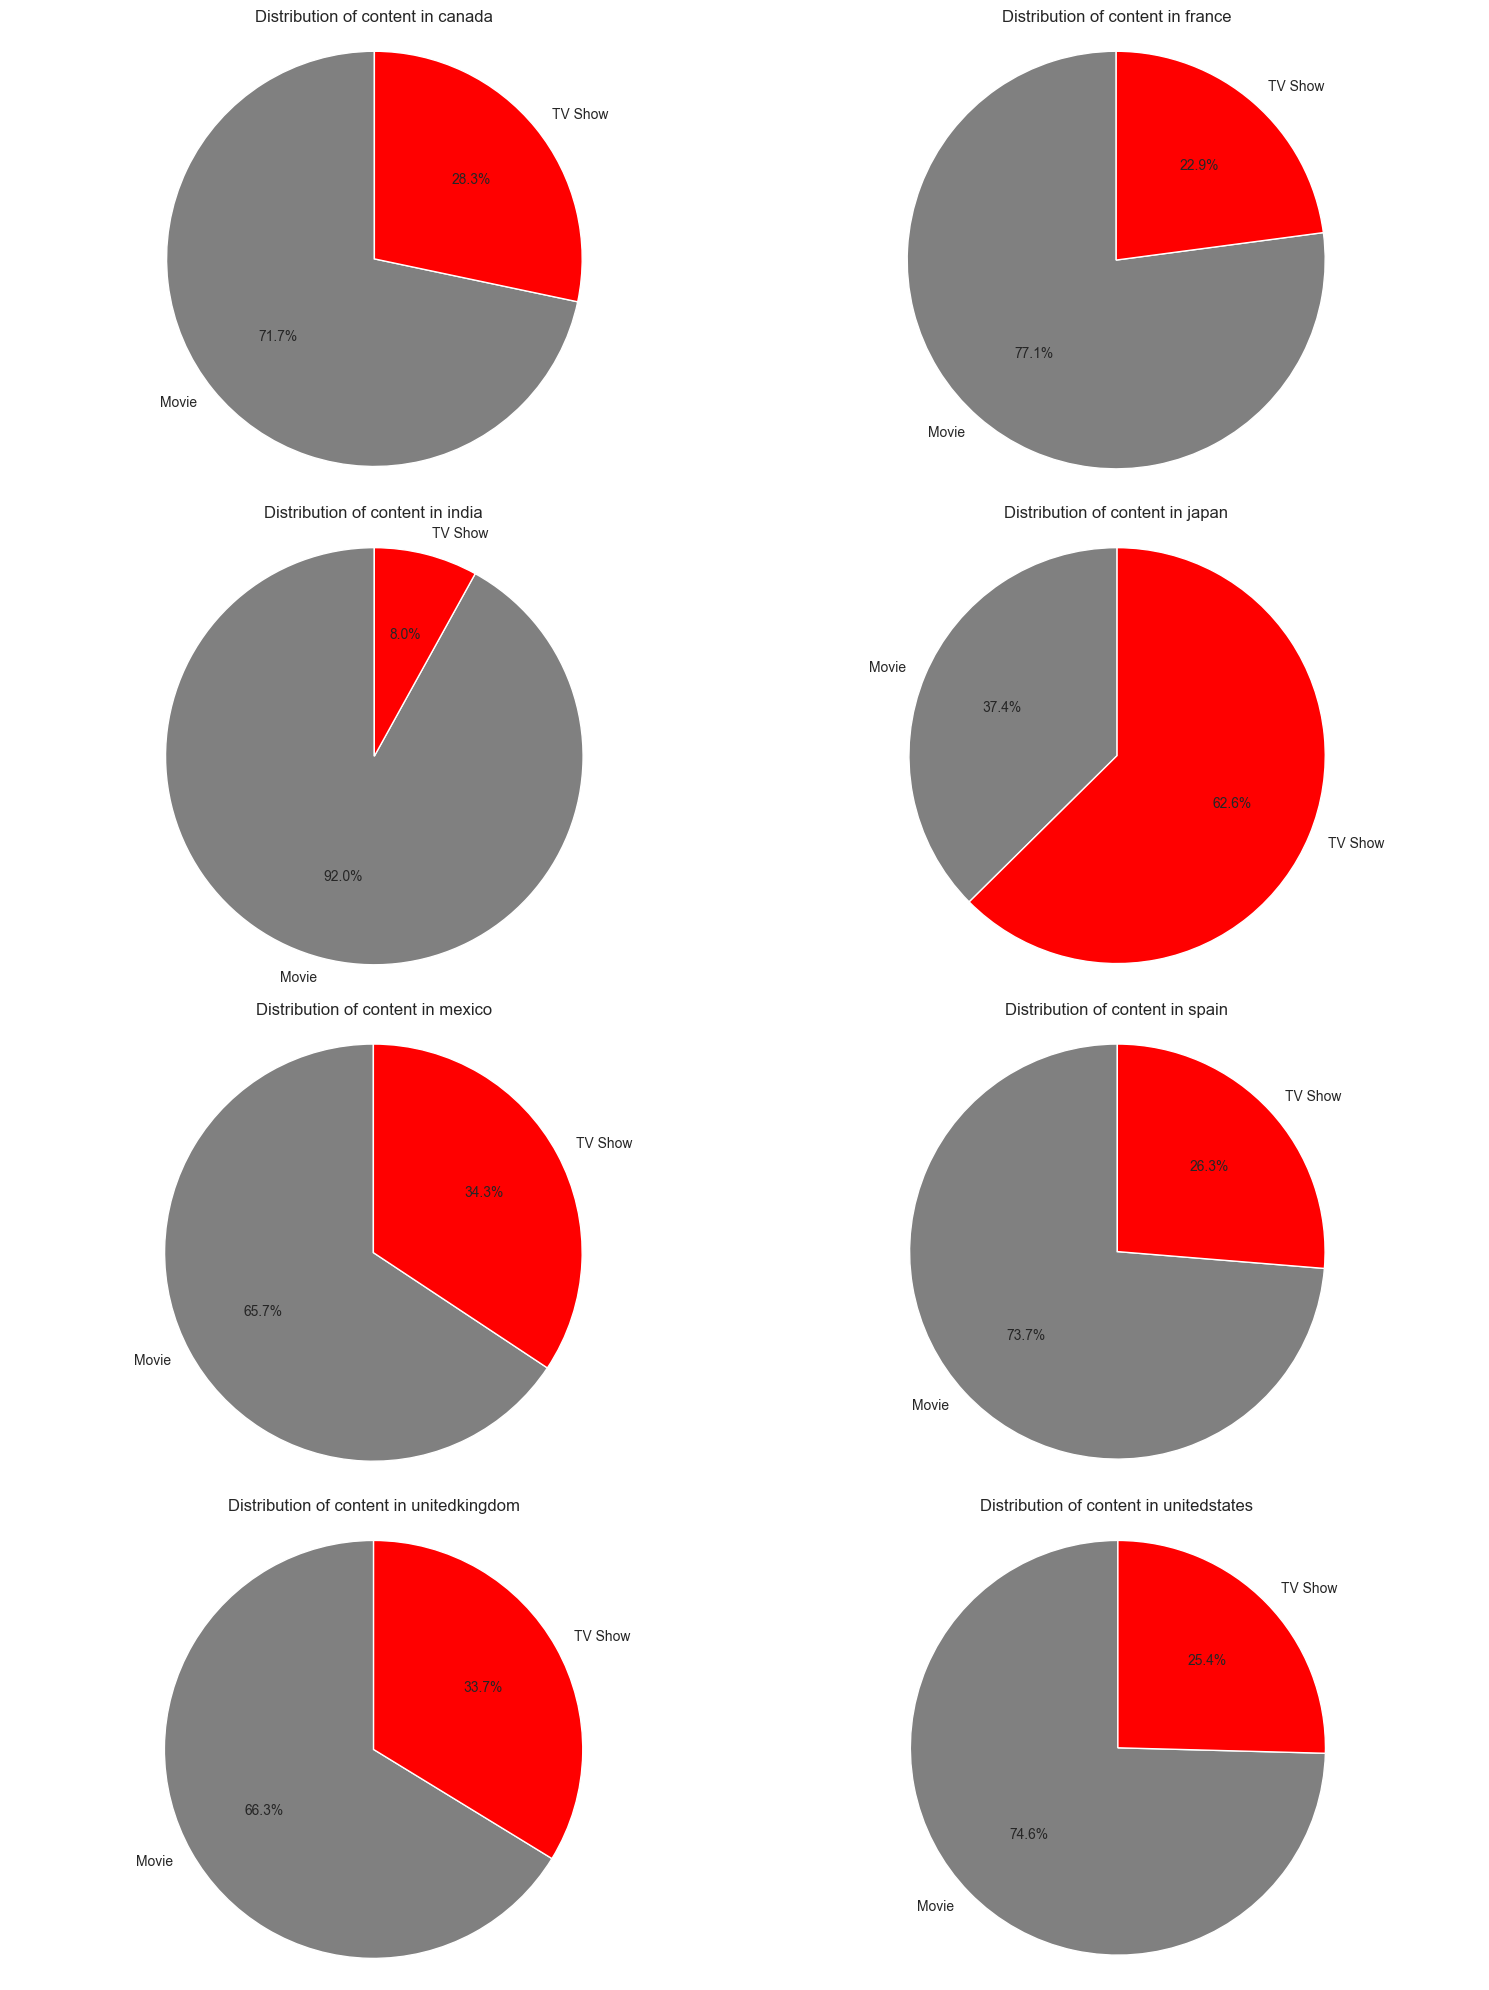

In [11]:
#Pie charts for the interest countries and its content
# Get unique countries
unique_countries = df_grouped_type['country'].unique()

num_rows = 4
num_cols = 2

# Create a grid of pie charts
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axis array for easy iteration
axs = axs.ravel()

for i, country in enumerate(unique_countries):
    if i < num_rows * num_cols:
        country_data = df_grouped_type[df_grouped_type['country'] == country]
        axs[i].pie(country_data['count'], labels=country_data['type'], autopct='%1.1f%%', startangle=90,
                    colors = ['gray', 'red'])
        axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        axs[i].set_title(f'Distribution of content in {country}')

# Hide remaining empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Director

In [12]:
#Displaying the top 15 directors, remember that this attribute is the one with most empty values 
director = df['director'].value_counts()
director.head(15)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Name: director, dtype: int64

## plot directors

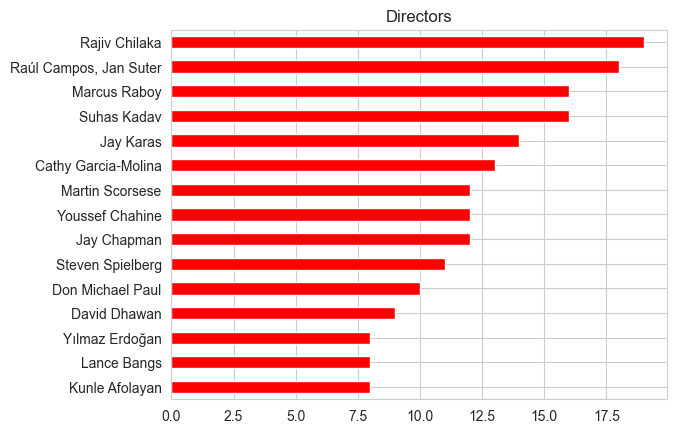

In [13]:
director[:15].plot(x = 'director', y = '', kind = 'barh', title='Directors', color = 'red').invert_yaxis()
plt.show()

# Cast

In [14]:
cast = df['cast']
cast[:5]

0                                                  NaN
1    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                  NaN
4    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
Name: cast, dtype: object

In [15]:
#There are several artist per Movie/TVShow, so we unpack them
cast = [c.split(',') for c in cast if isinstance(c, str)]
cast[:2]

[['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Cindy Mahlangu',
  ' Ryle De Morny',
  ' Greteli Fincham',
  ' Sello Maake Ka-Ncube',
  ' Odwa Gwanya',
  ' Mekaila Mathys',
  ' Sandi Schultz',
  ' Duane Williams',
  ' Shamilla Miller',
  ' Patrick Mofokeng'],
 ['Sami Bouajila',
  ' Tracy Gotoas',
  ' Samuel Jouy',
  ' Nabiha Akkari',
  ' Sofia Lesaffre',
  ' Salim Kechiouche',
  ' Noureddine Farihi',
  ' Geert Van Rampelberg',
  ' Bakary Diombera']]

In [16]:
merged_cast = []
for c in cast:
  merged_cast.extend(c)
merged_cast[:5]

['Ama Qamata',
 ' Khosi Ngema',
 ' Gail Mabalane',
 ' Thabang Molaba',
 ' Dillon Windvogel']

## plot cast

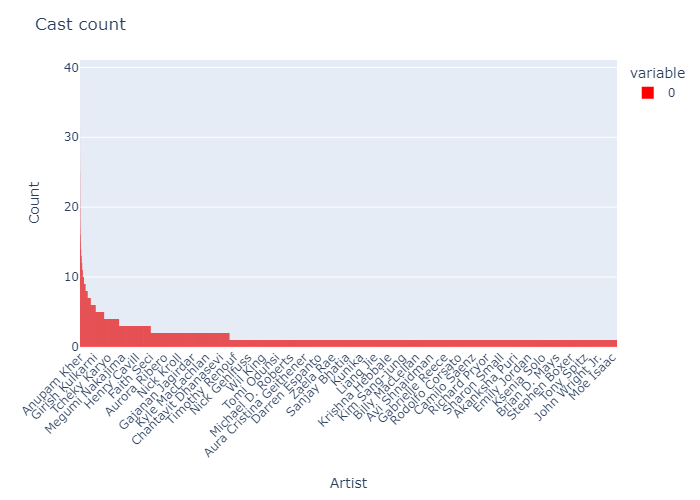

In [26]:
from plotly.express import histogram

fig = histogram(merged_cast, color_discrete_sequence = ['red']).update_xaxes(categoryorder='total descending')
fig.update_layout(title = 'Cast Histogram')
fig.update_layout(title='Cast count', xaxis_title='Artist', yaxis_title='Count')
fig.update_layout(xaxis_tickangle=-45)
fig.show('png') #specify 'png' to ensure display on github, if you run in notebook remove parameter to have an interactive plot

## Cast per country

# Country

In [18]:
df['country'].value_counts()[:5]

unitedstates     2818
india             972
unitedkingdom     419
japan             245
southkorea        199
Name: country, dtype: int64

In [19]:
#df['country'] = df['country'].str.lower()
#df['country'] = df['country'].replace(' ', '', regex=True)
#df['country'].head()

In [20]:
#As wa can observe, there are several countries for som items
country = df['country']
country = [c.split(',') for c in country if isinstance(c, str)]
country[:5]

[['unitedstates'],
 ['southafrica'],
 ['india'],
 ['unitedstates',
  'ghana',
  'burkinafaso',
  'unitedkingdom',
  'germany',
  'ethiopia'],
 ['unitedkingdom']]

In [21]:
#We unpack those items
countries = []
for c in country:
  countries.extend(c)
#for i in range(len(countries)):
#    countries[i] = countries[i].replace(' ', '')

In [22]:
#When we unpack we have more information
len(df['country']), len(countries)

(8807, 10019)

In [23]:
#Count the times a country appear
counts_countries = Counter(countries)
counter_df = pd.DataFrame(list(counts_countries.items()), columns=['countries', 'counts'])
counter_df_sorted = counter_df.sort_values(by='counts', ascending=False).reset_index(drop=True)
counter_df_sorted.head()

,countries,counts
0,unitedstates,3690
1,india,1046
2,unitedkingdom,806
3,canada,445
4,france,393


## plot count countrys

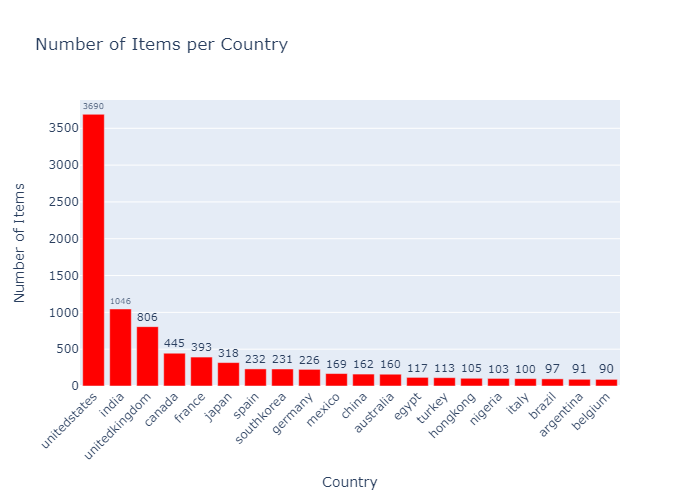

In [27]:
import plotly.graph_objects as go

top_N_countries = 20
top_countries = counter_df_sorted['countries'][:top_N_countries]
top_values = counter_df_sorted['counts'][:top_N_countries]

fig = go.Figure([go.Bar(x=top_countries, y=top_values, marker = dict(color = 'red'))])

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.update_layout(title='Number of Items per Country', xaxis_title='Country', yaxis_title='Number of Items')
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

fig.show('png') #specify 'png' to ensure display on github, if you run in notebook remove parameter to have an interactive plot

# Date added

## Date added per movie and TV Shows

In [189]:
date_added_Movies, date_added_TV_shows = [], []
for i in range(len(df)):
  if df['type'].iloc[i] == 'Movie' and isinstance(df['date_added'].iloc[i], str):
    try:
      date_added_Movies.append(df['date_added'].iloc[i].split(' ')[0] + df['date_added'].iloc[i].split(',')[1][-5:])
    except:
      pass
  elif df['type'].iloc[i] == 'TV Show' and isinstance(df['date_added'].iloc[i], str):
    try:
      date_added_TV_shows.append(df['date_added'].iloc[i].split(' ')[0] + df['date_added'].iloc[i].split(',')[1][-5:])
    except:
      pass

In [190]:
count_date_added_Movies, count_date_added_TV_shows = Counter(date_added_Movies), Counter(date_added_TV_shows)

## plot date added per movie and TV Shows

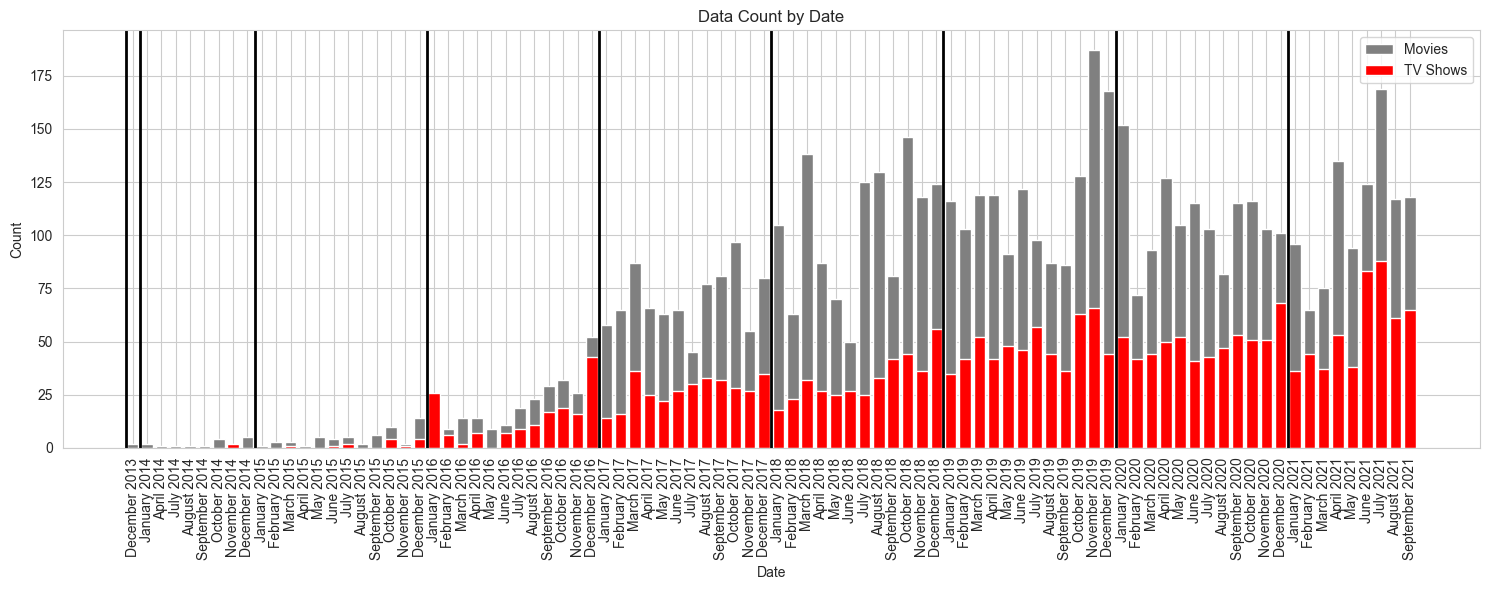

In [191]:
dates_movies = list(count_date_added_Movies.keys())[:-15]
values_movies = list(count_date_added_Movies.values())[:-15]
dates_TVShows = list(count_date_added_TV_shows.keys())[:-17]
values_TVShows = list(count_date_added_TV_shows.values())[:-17]

plt.figure(figsize=(15, 6))
plt.bar(dates_movies[::-1], values_movies[::-1], label = 'Movies', color = 'gray')
plt.bar(dates_TVShows[::-1], values_TVShows[::-1], label = 'TV Shows', color = 'red')


plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Data Count by Date')
plt.xticks(rotation=90)

# Adding division lines for each new year
prev_year = 2008
for i, Date in enumerate(dates_movies[::-1]):
  year = Date.split(' ')[1]
  if year != prev_year:
    plt.axvline(x=i-.5, color='k', linestyle='-', linewidth=2)
    prev_year = year
plt.legend()
plt.tight_layout()
plt.show()

# Release_year

In [29]:
release_year = df['release_year']
release_year = Counter(release_year)
release_year = dict(sorted(release_year.items(), reverse=True))
list(release_year.items())[:5] #displaying the first elements

[(2021, 592), (2020, 953), (2019, 1030), (2018, 1147), (2017, 1032)]

## plot release year

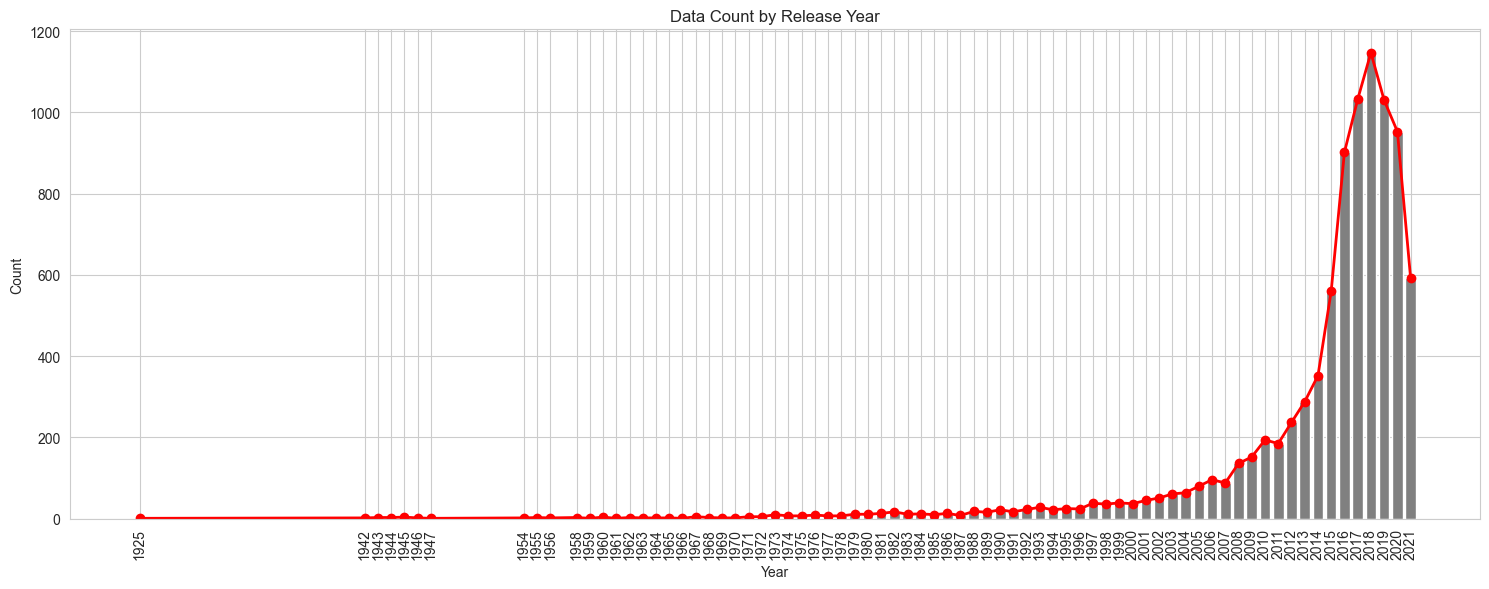

In [39]:
dates = list(release_year.keys())
values = list(release_year.values())

plt.figure(figsize=(15, 6))
plt.bar(dates[::-1], values[::-1], color = 'gray')

plt.plot(dates[::-1], values[::-1], color='red', marker='o', linestyle='-', linewidth=2, label='Curve')


plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Data Count by Release Year')
plt.xticks(dates, rotation=90)
#plt.xticks(range(0, 36, 1), rotation=90)
plt.tight_layout()
plt.show()

# rating (classification)

In [97]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [98]:
rating = df['rating'].value_counts()
rating

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [99]:
labels = [rating.index[i] +': ' + str(rating[i]) for i in range(len(rating))]
labels

['TV-MA: 3207',
 'TV-14: 2160',
 'TV-PG: 863',
 'R: 799',
 'PG-13: 490',
 'TV-Y7: 334',
 'TV-Y: 307',
 'PG: 287',
 'TV-G: 220',
 'NR: 80',
 'G: 41',
 'TV-Y7-FV: 6',
 'NC-17: 3',
 'UR: 3',
 '74 min: 1',
 '84 min: 1',
 '66 min: 1']

## plot rating (classificaction)

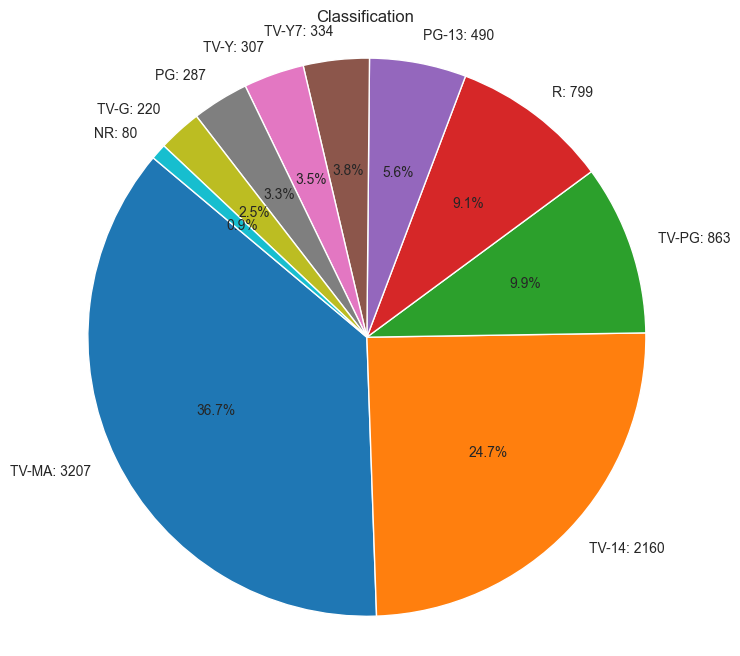

In [100]:
plt.figure(figsize=(8, 8))
plt.pie(rating[:-7], labels=labels[:-7],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Classification')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Duration

In [101]:
df['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [102]:
duration_TV_shows = []
duration_movies = []

In [103]:
#df['duration'].iloc[0][:-4]
import re
re.search('(\d+)', df['duration'].iloc[0]).group(1)

'90'

In [104]:
df['duration'].iloc[1][:-8]
re.search('(\d+)', df['duration'].iloc[1]).group(1)

'2'

In [105]:
for i in range(len(df)):
  if df['type'].iloc[i] == 'Movie':
    try:
      duration_movies.append(int(re.search('(\d+)', df['duration'].iloc[i]).group(1)))
    except:
      pass
  elif df['type'].iloc[i] == 'TV Show':
    try:
      duration_TV_shows.append(int(re.search('(\d+)', df['duration'].iloc[i]).group(1)))
    except:
      pass

In [106]:
duration_TV_shows_counter = Counter(duration_TV_shows)
duration_TV_shows_counter

Counter({2: 425,
         1: 1793,
         9: 9,
         4: 95,
         5: 65,
         3: 199,
         6: 33,
         7: 23,
         10: 7,
         8: 17,
         17: 1,
         13: 3,
         15: 2,
         12: 2,
         11: 2})

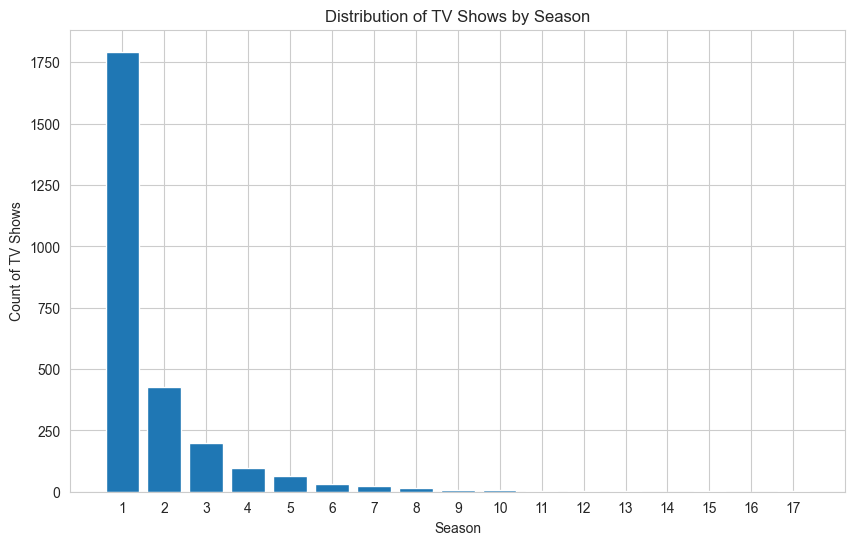

In [107]:
import matplotlib.pyplot as plt

data = duration_TV_shows_counter

# Create a list of counts for each season (filling in zeros for missing data)
counts = [data.get(season, 0) for season in range(1, 18)]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(range(1, 18), counts)
plt.xlabel('Season')
plt.ylabel('Count of TV Shows')
plt.title('Distribution of TV Shows by Season')
plt.grid(True)
plt.xticks(range(1, 18))
plt.show()


In [108]:
duration_movies_counter = Counter(duration_movies)
duration_movies_counter

Counter({90: 152,
         91: 144,
         125: 36,
         104: 104,
         127: 48,
         67: 21,
         94: 146,
         161: 10,
         61: 31,
         166: 8,
         147: 12,
         103: 114,
         97: 146,
         106: 111,
         111: 68,
         110: 97,
         105: 101,
         96: 130,
         124: 52,
         116: 80,
         98: 120,
         23: 13,
         115: 61,
         122: 45,
         99: 118,
         88: 116,
         100: 108,
         102: 122,
         93: 146,
         95: 137,
         85: 73,
         83: 65,
         113: 69,
         13: 3,
         182: 3,
         48: 8,
         145: 18,
         87: 101,
         92: 129,
         80: 43,
         117: 61,
         128: 41,
         119: 63,
         143: 23,
         114: 56,
         118: 65,
         108: 87,
         63: 32,
         121: 54,
         142: 13,
         154: 13,
         120: 56,
         82: 52,
         109: 69,
         101: 116,
         86: 103,

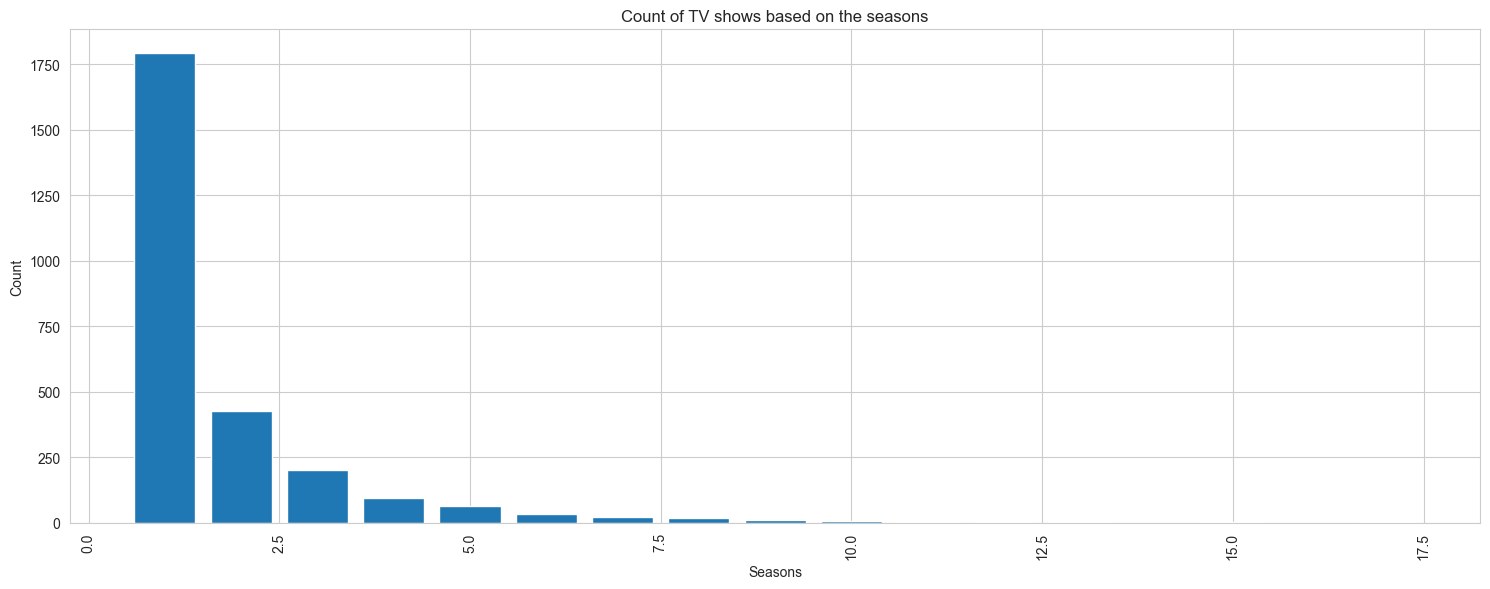

In [109]:
dates = list(duration_TV_shows_counter.keys())
values = list(duration_TV_shows_counter.values())

plt.figure(figsize=(15, 6))
plt.bar(dates, values)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Count of TV shows based on the seasons')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

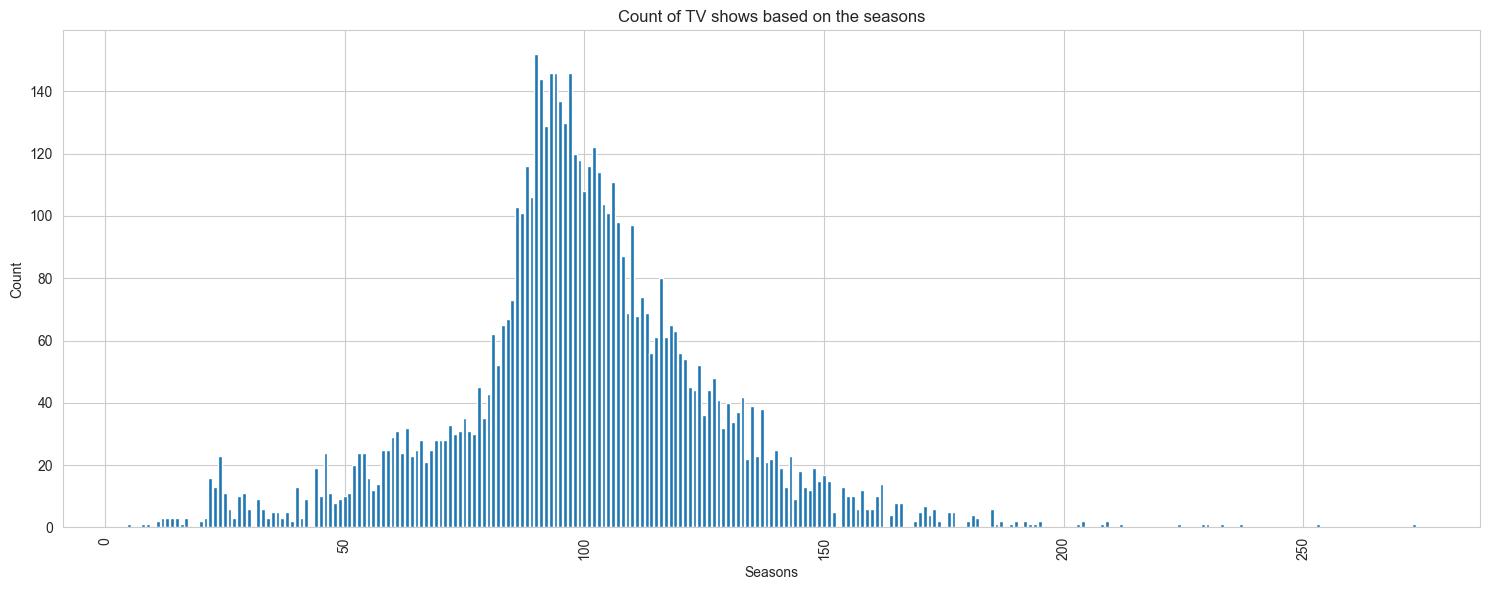

In [110]:
dates = list(duration_movies_counter.keys())[:-20]
values = list(duration_movies_counter.values())[:-20]

plt.figure(figsize=(15, 6))
plt.bar(dates, values)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.title('Count of TV shows based on the seasons')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [111]:
duration_movies_sorted = dict(sorted(duration_movies.items()))
duration_movies_sorted

AttributeError: 'list' object has no attribute 'items'

In [112]:
duration_movies

[90,
 91,
 125,
 104,
 127,
 91,
 67,
 94,
 161,
 61,
 166,
 147,
 103,
 97,
 106,
 111,
 110,
 105,
 96,
 124,
 116,
 98,
 91,
 23,
 115,
 122,
 99,
 99,
 88,
 100,
 102,
 93,
 96,
 95,
 85,
 97,
 95,
 83,
 103,
 113,
 13,
 182,
 106,
 48,
 145,
 145,
 93,
 106,
 147,
 87,
 96,
 95,
 92,
 91,
 90,
 97,
 80,
 117,
 128,
 90,
 119,
 110,
 143,
 119,
 114,
 94,
 106,
 99,
 118,
 115,
 95,
 115,
 108,
 63,
 117,
 121,
 142,
 113,
 154,
 95,
 108,
 120,
 100,
 82,
 124,
 114,
 104,
 94,
 94,
 93,
 97,
 109,
 88,
 101,
 105,
 102,
 101,
 103,
 106,
 118,
 86,
 121,
 229,
 76,
 95,
 98,
 89,
 120,
 110,
 83,
 121,
 105,
 94,
 156,
 112,
 95,
 107,
 114,
 129,
 86,
 97,
 125,
 107,
 127,
 128,
 92,
 135,
 124,
 136,
 165,
 124,
 136,
 150,
 112,
 119,
 133,
 142,
 93,
 113,
 124,
 116,
 106,
 145,
 93,
 95,
 108,
 90,
 86,
 92,
 82,
 70,
 122,
 122,
 122,
 122,
 84,
 96,
 115,
 110,
 88,
 102,
 91,
 105,
 135,
 86,
 140,
 133,
 92,
 82,
 97,
 78,
 94,
 121,
 97,
 110,
 64,
 59,
 101,
 127,
 9

In [113]:
dict(sorted(duration_movies_counter.items()))

{3: 1,
 5: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 2,
 12: 3,
 13: 3,
 14: 3,
 15: 3,
 16: 1,
 17: 3,
 18: 1,
 19: 2,
 20: 2,
 21: 3,
 22: 16,
 23: 13,
 24: 23,
 25: 11,
 26: 6,
 27: 3,
 28: 10,
 29: 11,
 30: 6,
 31: 2,
 32: 9,
 33: 6,
 34: 3,
 35: 5,
 36: 5,
 37: 3,
 38: 5,
 39: 2,
 40: 13,
 41: 3,
 42: 9,
 43: 1,
 44: 19,
 45: 10,
 46: 24,
 47: 11,
 48: 8,
 49: 9,
 50: 10,
 51: 11,
 52: 20,
 53: 24,
 54: 24,
 55: 16,
 56: 12,
 57: 14,
 58: 25,
 59: 25,
 60: 29,
 61: 31,
 62: 24,
 63: 32,
 64: 23,
 65: 25,
 66: 28,
 67: 21,
 68: 25,
 69: 28,
 70: 28,
 71: 28,
 72: 33,
 73: 30,
 74: 31,
 75: 35,
 76: 31,
 77: 30,
 78: 45,
 79: 35,
 80: 43,
 81: 62,
 82: 52,
 83: 65,
 84: 67,
 85: 73,
 86: 103,
 87: 101,
 88: 116,
 89: 106,
 90: 152,
 91: 144,
 92: 129,
 93: 146,
 94: 146,
 95: 137,
 96: 130,
 97: 146,
 98: 120,
 99: 118,
 100: 108,
 101: 116,
 102: 122,
 103: 114,
 104: 104,
 105: 101,
 106: 111,
 107: 98,
 108: 87,
 109: 69,
 110: 97,
 111: 68,
 112: 74,
 113: 69,
 114: 56,
 115: 61,
 116: 80,


In [114]:
duration_movies = [int(x) for x in duration_movies]
duration_TV_shows = [int(x) for x in duration_TV_shows if x != '']

In [115]:
duration_TV_shows

[2,
 1,
 1,
 2,
 1,
 9,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 5,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 6,
 6,
 1,
 9,
 1,
 1,
 5,
 2,
 1,
 6,
 1,
 1,
 2,
 4,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 2,
 5,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 3,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 5,
 1,
 2,
 1,
 1,
 2,
 1,
 5,
 1,
 7,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 7,
 3,
 1,
 5,
 6,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 7,
 1,
 3,
 3,
 4,
 1,
 10,
 4,
 1,
 1,
 1,
 2,
 2,
 5,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 2,
 2,
 4,
 3,
 5,
 2,
 2,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 8,
 7,
 2,
 2,
 3,
 3,
 2,
 3,
 6,
 2,
 2,
 4,
 2,
 5,
 3,
 1,
 1,
 17,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 5,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 4,
 4,
 1,
 1,
 2,
 2,
 1,
 6,
 3,
 5,
 1,
 2,
 1,
 4,
 6,
 1,
 1,
 1

## plot duration movies

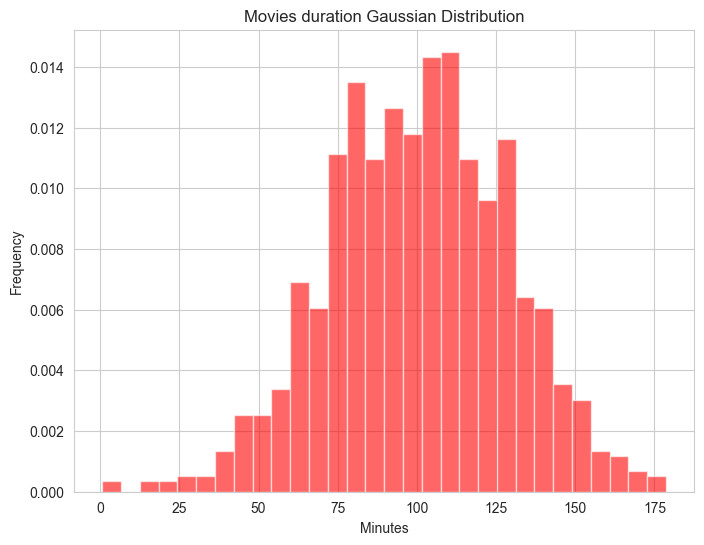

In [116]:
data = duration_movies

# Calculate mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Generate random samples from a Gaussian distribution
gaussian_samples = np.random.normal(mean, std_dev, 1000)

# Plotting the Gaussian distribution
plt.figure(figsize=(8, 6))
plt.hist(gaussian_samples, bins=30, density=True, alpha=0.6, color='r')
plt.title('Movies duration Gaussian Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## plot duration tv shows

In [117]:
duration_TV_shows.sort()

In [118]:
len(duration_TV_shows)

2676

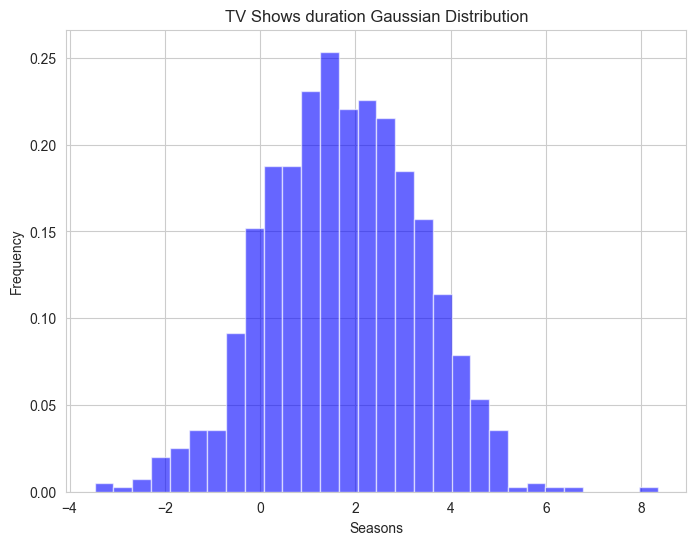

In [119]:
data = duration_TV_shows

# Calculate mean and standard deviation of the data
mean = np.mean(data)
std_dev = np.std(data)

# Generate random samples from a Gaussian distribution
gaussian_samples = np.random.normal(mean, std_dev, 1000)

# Plotting the Gaussian distribution
plt.figure(figsize=(8, 6))
plt.hist(gaussian_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('TV Shows duration Gaussian Distribution')
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [120]:
import plotly.graph_objs as go
import numpy as np

# Example array of data
data_array = duration_TV_shows

# Create histogram
histogram = go.Histogram(x=data_array, histnorm='probability')

# Create layout
layout = go.Layout(
    title='Gaussian Distribution',
    xaxis=dict(title='Value'),
    yaxis=dict(title='Probability')
)

# Create figure
fig = go.Figure(data=[histogram], layout=layout)

# Show plot
fig.show()


In [121]:
seasons

NameError: name 'seasons' is not defined

In [122]:
counts

[1793, 425, 199, 95, 65, 33, 23, 17, 9, 7, 2, 2, 3, 0, 2, 0, 1]

In [123]:
list(range(min(seasons), max(seasons)+1))

NameError: name 'seasons' is not defined

In [124]:
import plotly.graph_objs as go

data = Counter(duration_TV_shows)

# Create a list of all seasons
all_seasons = list(range(1, max(data.keys()) + 1))

# Create a list of counts for all seasons, filling in 0 for missing data
counts = [data.get(season, 0) for season in all_seasons]

# Create bar chart
bar_chart = go.Bar(x=all_seasons, y=counts)

# Create layout
layout = go.Layout(
    title='TV Shows by Season',
    #xaxis=dict(title='Season', tickmode='array', tickvals=all_seasons),
    xaxis=dict(title='Season', tickmode='array', tickvals=all_seasons, tickangle=-90),
    yaxis=dict(title='Number of TV Shows')
)

# Create figure
fig = go.Figure(data=[bar_chart], layout=layout)

# Show plot
fig.show()

In [125]:
data = Counter(duration_movies)

# Create a list of all seasons
all_seasons = list(range(1, max(data.keys()) + 1))

# Create a list of counts for all seasons, filling in 0 for missing data
counts = [data.get(season, 0) for season in all_seasons]

# Create bar chart
bar_chart = go.Bar(x=all_seasons, y=counts)

# Create layout
layout = go.Layout(
    title='Movies duration in minutes',
    #xaxis=dict(title='Season', tickmode='array', tickvals=all_seasons),
    xaxis=dict(title='Minutes', tickmode='array', tickvals=all_seasons, tickangle=-90, tickfont=dict(size=5)),
    yaxis=dict(title='Movies')
)

# Create figure
fig = go.Figure(data=[bar_chart], layout=layout)

# Show plot
fig.show()

In [126]:
import plotly.graph_objects as go

# Sample data
data = duration_TV_shows

# Create histogram
fig = go.Figure(data=[go.Histogram(x=data)])

# Update layout
fig.update_layout(
    title="Histogram",
    xaxis_title="Value",
    yaxis_title="Frequency"
)

# Show plot
fig.show()


# listed_in (category)

In [127]:
category = df['listed_in']
category

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8807, dtype: object

In [128]:
category = [c.split(', ') for c in category if isinstance(c, str)]
category[:2]

[['Documentaries'], ['International TV Shows', 'TV Dramas', 'TV Mysteries']]

In [129]:
total_category = []
for c in category:
  total_category.extend(c)
total_category[:28]

['Documentaries',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Crime TV Shows',
 'International TV Shows',
 'TV Action & Adventure',
 'Docuseries',
 'Reality TV',
 'International TV Shows',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'Children & Family Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'British TV Shows',
 'Reality TV',
 'Comedies',
 'Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Crime TV Shows',
 'International TV Shows']

In [130]:
sorted(Counter(total_category).items(), key=lambda x: x[1], reverse=True)

[('International Movies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('International TV Shows', 1351),
 ('Documentaries', 869),
 ('Action & Adventure', 859),
 ('TV Dramas', 763),
 ('Independent Movies', 756),
 ('Children & Family Movies', 641),
 ('Romantic Movies', 616),
 ('TV Comedies', 581),
 ('Thrillers', 577),
 ('Crime TV Shows', 470),
 ("Kids' TV", 451),
 ('Docuseries', 395),
 ('Music & Musicals', 375),
 ('Romantic TV Shows', 370),
 ('Horror Movies', 357),
 ('Stand-Up Comedy', 343),
 ('Reality TV', 255),
 ('British TV Shows', 253),
 ('Sci-Fi & Fantasy', 243),
 ('Sports Movies', 219),
 ('Anime Series', 176),
 ('Spanish-Language TV Shows', 174),
 ('TV Action & Adventure', 168),
 ('Korean TV Shows', 151),
 ('Classic Movies', 116),
 ('LGBTQ Movies', 102),
 ('TV Mysteries', 98),
 ('Science & Nature TV', 92),
 ('TV Sci-Fi & Fantasy', 84),
 ('TV Horror', 75),
 ('Anime Features', 71),
 ('Cult Movies', 71),
 ('Teen TV Shows', 69),
 ('Faith & Spirituality', 65),
 ('TV Thrillers', 57),


In [131]:
total_category = [elem.replace(' ', '') for elem in total_category]
total_category

['Documentaries',
 'InternationalTVShows',
 'TVDramas',
 'TVMysteries',
 'CrimeTVShows',
 'InternationalTVShows',
 'TVAction&Adventure',
 'Docuseries',
 'RealityTV',
 'InternationalTVShows',
 'RomanticTVShows',
 'TVComedies',
 'TVDramas',
 'TVHorror',
 'TVMysteries',
 'Children&FamilyMovies',
 'Dramas',
 'IndependentMovies',
 'InternationalMovies',
 'BritishTVShows',
 'RealityTV',
 'Comedies',
 'Dramas',
 'CrimeTVShows',
 'Docuseries',
 'InternationalTVShows',
 'CrimeTVShows',
 'InternationalTVShows',
 'TVAction&Adventure',
 'Dramas',
 'InternationalMovies',
 'Children&FamilyMovies',
 'Comedies',
 'BritishTVShows',
 'CrimeTVShows',
 'Docuseries',
 'TVComedies',
 'TVDramas',
 'Documentaries',
 'InternationalMovies',
 'CrimeTVShows',
 'Spanish-LanguageTVShows',
 'TVDramas',
 'Thrillers',
 'InternationalTVShows',
 'Spanish-LanguageTVShows',
 'TVAction&Adventure',
 'CrimeTVShows',
 'Docuseries',
 'InternationalTVShows',
 'InternationalTVShows',
 'TVAction&Adventure',
 'TVDramas',
 'Comedie

In [132]:
counts_category = sorted(Counter(total_category).items(), key=lambda x: x[1], reverse=True)
counts_category

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('InternationalTVShows', 1351),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('TVDramas', 763),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('TVComedies', 581),
 ('Thrillers', 577),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('Music&Musicals', 375),
 ('RomanticTVShows', 370),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('TeenTVShows', 69),
 ('Faith&Spirituality', 65),
 ('TVThrillers', 57),
 ('Movies', 57),
 ('Stand-UpComedy&TalkShows', 56),


## Wordcloud plot

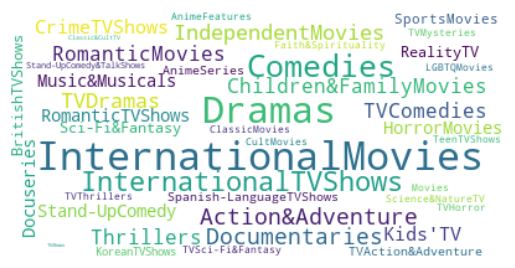

In [133]:
word_list = total_category

# Join the words into a single string separated by spaces
text = ' '.join(word_list)

# Generate a word cloud
wordcloud = WordCloud(background_color='white', max_words  = 42).generate_from_frequencies(Counter(total_category))

# Display the word cloud using matplotlib
plt.figure()#figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()